In [2]:
library(dplyr)
library(readr)
library(ggplot2)

In [3]:
iris <- read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                  col_names = c("sepal.length", "sepal.width","petal.length","petal.width","Species"),
                  col_types = cols(Species = col_factor(levels = c("Iris-setosa","Iris-virginica","Iris-versicolor"))))

In [4]:
dim(iris)

[1] 150   5

In [5]:
head(iris)

sepal.length,sepal.width,petal.length,petal.width,Species
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
tail(iris)

sepal.length,sepal.width,petal.length,petal.width,Species
6.7,3.3,5.7,2.5,Iris-virginica
6.7,3.0,5.2,2.3,Iris-virginica
6.3,2.5,5.0,1.9,Iris-virginica
6.5,3.0,5.2,2.0,Iris-virginica
6.2,3.4,5.4,2.3,Iris-virginica
5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
## checking the datatype of each column

In [8]:
sapply(iris, class)

sepal.length  sepal.width petal.length  petal.width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

In [9]:
str(iris)

Classes 'tbl_df', 'tbl' and 'data.frame':	150 obs. of  5 variables:
 $ sepal.length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ sepal.width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ petal.length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ petal.width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "Iris-setosa",..: 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 5
  .. ..$ sepal.length: list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  .. ..$ sepal.width : list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  .. ..$ petal.length: list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  .. ..$ petal.width : list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  .. ..$ Species     :List of 3
  .. .. ..$ levels    : chr  "Iris-setosa" "Iris-virginica" "Iris-versicolor"
  .. .. ..$ ordered   : logi FALSE
  .. .. ..$ in

In [10]:
## calculating univariate statistics on each column

In [11]:
summary(iris)

  sepal.length    sepal.width     petal.length    petal.width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.054   Mean   :3.759   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
            Species  
 Iris-setosa    :50  
 Iris-virginica :50  
 Iris-versicolor:50  
                     
                     
                     

In [12]:
## calculating univariate statistics on each species

In [14]:
tapply(iris[["sepal.length"]], iris$Species, summary)

$`Iris-setosa`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.300   4.800   5.000   5.006   5.200   5.800 

$`Iris-virginica`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.900   6.225   6.500   6.588   6.900   7.900 

$`Iris-versicolor`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.900   5.600   5.900   5.936   6.300   7.000 


In [15]:
tapply(iris[["sepal.width"]], iris$Species, summary)

$`Iris-setosa`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.300   3.125   3.400   3.418   3.675   4.400 

$`Iris-virginica`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.200   2.800   3.000   2.974   3.175   3.800 

$`Iris-versicolor`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.525   2.800   2.770   3.000   3.400 


In [16]:
summarise(group_by(iris,Species), mean(sepal.length))

Species,mean(sepal.length)
Iris-setosa,5.006
Iris-virginica,6.588
Iris-versicolor,5.936


In [17]:
summarise(group_by(iris,Species), median(sepal.length))

Species,median(sepal.length)
Iris-setosa,5.0
Iris-virginica,6.5
Iris-versicolor,5.9


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


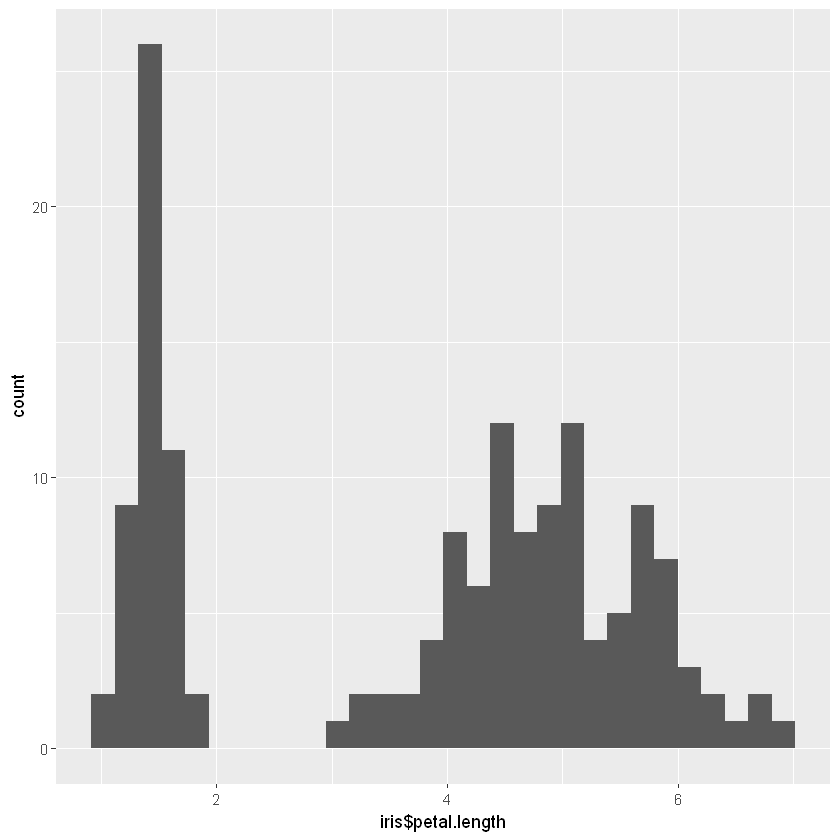

In [18]:
ggplot(iris, aes(iris$petal.length)) + geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


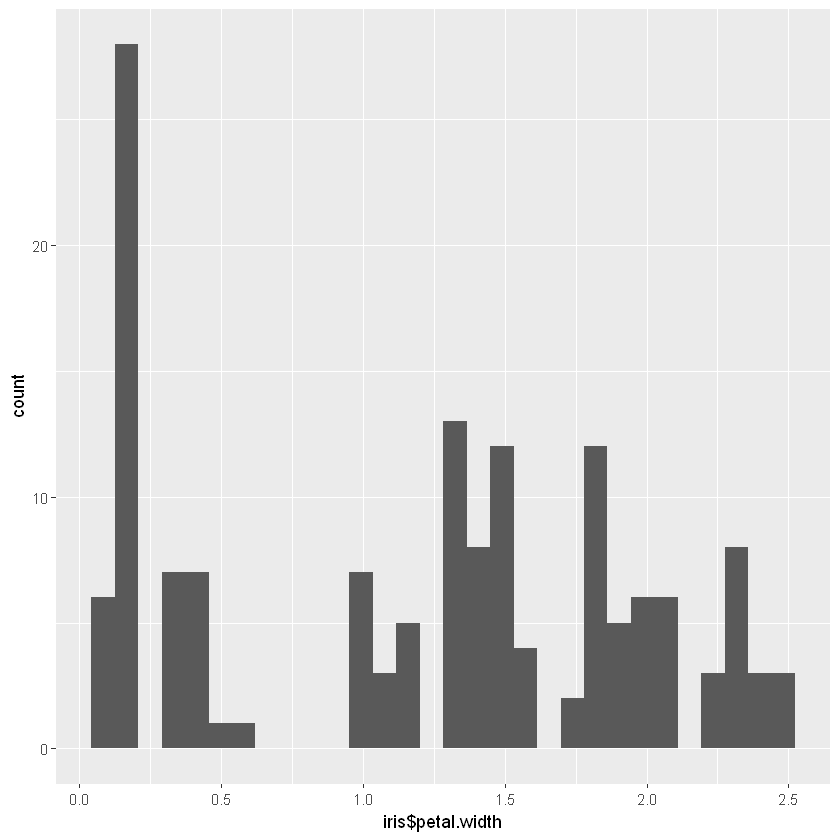

In [19]:
ggplot(iris, aes(iris$petal.width)) + geom_histogram()

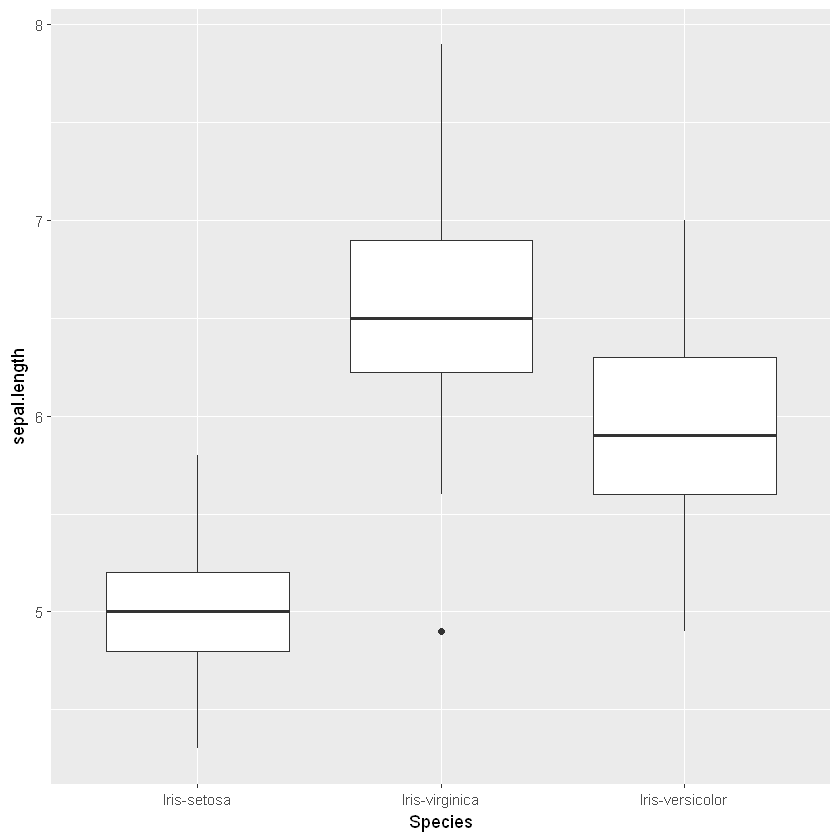

In [20]:
ggplot(iris, aes(Species,sepal.length)) + geom_boxplot()